<a href="https://colab.research.google.com/github/Harithagitub/AI-assignment1-/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv('bank.csv', delimiter=';')
print(df.head())
print(df.dtypes)


   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
age           int64
job          object
marital      object
education    object
default      object
balance    

In [4]:
df2 = df[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]


In [5]:
df3 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'poutcome'])


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.show()


<Figure size 1200x1000 with 0 Axes>

In [9]:
y = df3['y']
X = df3.drop('y', axis=1)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


    y  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0  no       False            False             False          False   
1  no       False            False             False          False   
2  no       False            False             False          False   
3  no       False            False             False          False   
4  no       False             True             False          False   

   job_management  job_retired  job_self-employed  job_services  job_student  \
0           False        False              False         False        False   
1           False        False              False          True        False   
2            True        False              False         False        False   
3            True        False              False         False        False   
4           False        False              False         False        False   

   ...  marital_married  marital_single  default_no  default_yes  housing_no  \
0  ...      

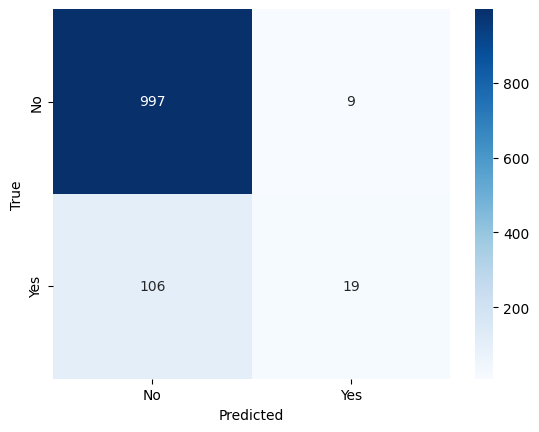

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('bank.csv', delimiter=';')
df2 = df[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]
df3 = pd.get_dummies(df2, columns=['job', 'marital', 'default', 'housing', 'poutcome'])

print(df3.head())

y = df3['y'].apply(lambda x: 1 if x == 'yes' else 0)
X = df3.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
